IMPORTING MODULES

In [2484]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import pylab as py

In [2485]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

READING DATA

In [2486]:
# Reading the dataset
os.chdir(r"C:\Users\Clemency Wilson\Downloads")
df=pd.read_excel('Concrete_Data.xls')

STUDY DATASET

In [2487]:
# Observing the summarized information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1022 non-null   float64
 1   BFSlag            1028 non-null   float64
 2   FlyAsh            1029 non-null   float64
 3   Water             1004 non-null   float64
 4   Superplasticizer  1022 non-null   float64
 5   CoarseAggregate   1013 non-null   float64
 6   FineAggregate     1017 non-null   float64
 7   Age               1029 non-null   object 
 8   Ccstrength        1028 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.5+ KB


In [2488]:
# Looking at the descriptive statistics of the data
df.describe()

,Cement,BFSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ccstrength
count,1022.000000,1028.000000,1029.000000,1004.000000,1022.000000,1013.000000,1017.000000,1028.000000
mean,281.191585,73.660360,54.163703,181.559163,6.198586,972.764511,773.837611,35.858030
std,104.911709,86.194361,64.023167,21.629519,5.994885,78.311115,80.418091,16.695688
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,730.000000,23.742796
50%,272.700000,22.000000,0.000000,185.700000,6.435000,967.400000,780.090000,34.522063
75%,353.750000,142.800000,118.270000,192.940000,10.160000,1030.000000,825.000000,46.208682
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,82.599225


In [2489]:
print("Shape before removing duplicates:",df.shape)

Shape before removing duplicates: (1030, 9)


In [2490]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

In [2491]:
# Removing duplicate rows if any
df=df.drop_duplicates()

In [2492]:
print("Shape after removing duplicates:",df.shape)

Shape after removing duplicates: (1006, 9)


In [2493]:
# Finding unique values for each column
df.nunique()

Cement              277
BFSlag              187
FlyAsh              162
Water               198
Superplasticizer    152
CoarseAggregate     279
FineAggregate       301
Age                  14
Ccstrength          936
dtype: int64

In [2494]:
df['Age']=df.Age.replace('1 year',365)

HANDLING NULL VALUES

In [2495]:
# Finding how many missing values are there for each column
df.isnull().sum()

Cement               8
BFSlag               2
FlyAsh               1
Water               26
Superplasticizer     8
CoarseAggregate     17
FineAggregate       13
Age                  1
Ccstrength           2
dtype: int64

In [2496]:
#The subset of the frame including the dtypes in include
num=df.select_dtypes(include=['int64','float64']).keys()

#imputing missing values
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
impute_fit=impute.fit(df[num])
df[num]=impute_fit.transform(df[num])
df

,Cement,BFSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Ccstrength
0,475.0,0.0,0.0,228.0,0.0,932.0,594.000000,28.0,39.289790
1,475.0,0.0,0.0,228.0,0.0,932.0,594.000000,180.0,42.620648
2,475.0,0.0,0.0,228.0,0.0,932.0,594.000000,7.0,38.603761
3,475.0,0.0,0.0,228.0,0.0,932.0,594.000000,270.0,42.131120
4,475.0,0.0,0.0,228.0,0.0,932.0,594.000000,90.0,42.229026
...,...,...,...,...,...,...,...,...,...
1025,375.0,93.8,0.0,126.6,23.4,852.1,992.600000,56.0,60.198150
1026,375.0,93.8,0.0,126.6,23.4,852.1,992.600000,91.0,62.500999
1027,266.0,114.0,0.0,228.0,0.0,932.0,772.951309,270.0,51.732763
1028,332.5,142.5,0.0,228.0,0.0,932.0,772.951309,270.0,40.269535


In [2497]:
df.isnull().sum()

Cement              0
BFSlag              0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Ccstrength          0
dtype: int64

In [2498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1006 non-null   float64
 1   BFSlag            1006 non-null   float64
 2   FlyAsh            1006 non-null   float64
 3   Water             1006 non-null   float64
 4   Superplasticizer  1006 non-null   float64
 5   CoarseAggregate   1006 non-null   float64
 6   FineAggregate     1006 non-null   float64
 7   Age               1006 non-null   float64
 8   Ccstrength        1006 non-null   float64
dtypes: float64(9)
memory usage: 78.6 KB


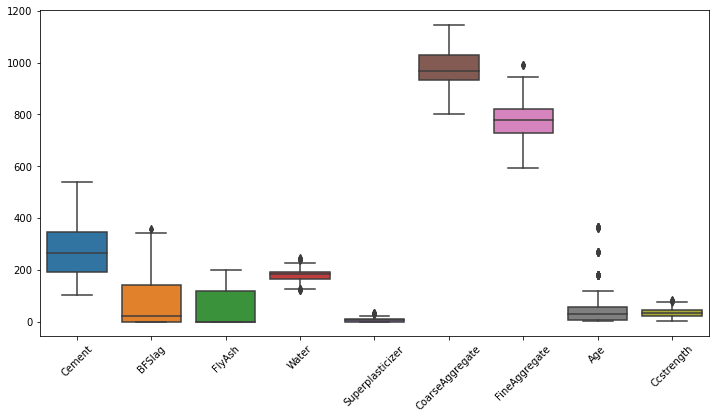

In [2499]:
plt.subplots(figsize=(12,6))
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

HANDLING OUTLIERS

<AxesSubplot:ylabel='Cement'>

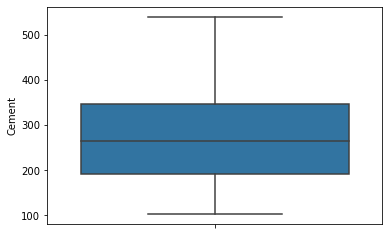

In [2500]:
sns.boxplot(y=df['Cement'])

<AxesSubplot:ylabel='BFSlag'>

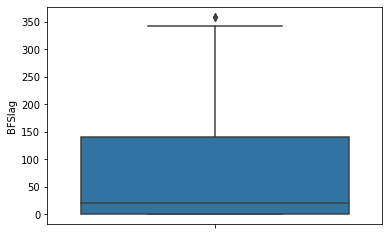

In [2501]:
sns.boxplot(y=df['BFSlag'])

In [2502]:
#replacing outliers in BFSlag with median
df['BFSlag']=np.where(df['BFSlag']>350,df['BFSlag'].median(),df['BFSlag'])

<AxesSubplot:ylabel='BFSlag'>

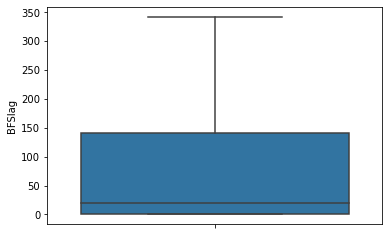

In [2503]:
sns.boxplot(y=df['BFSlag'])

<AxesSubplot:ylabel='FlyAsh'>

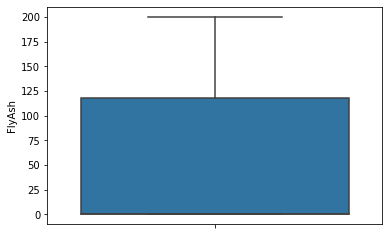

In [2504]:
sns.boxplot(y=df['FlyAsh'])

<AxesSubplot:ylabel='Water'>

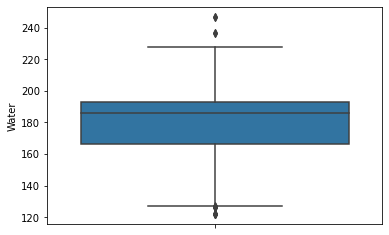

In [2505]:
sns.boxplot(y=df['Water'])

In [2506]:
#replacing outliers in Water with median
df['Water']=np.where(df['Water']>220,df['Water'].median(),df['Water'])
df['Water']=np.where(df['Water']<135,df['Water'].median(),df['Water'])

<AxesSubplot:ylabel='Water'>

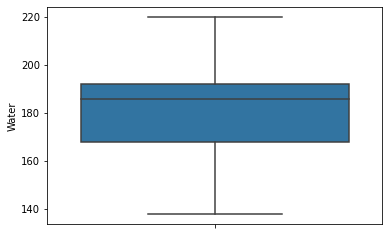

In [2507]:
sns.boxplot(y=df['Water'])

<AxesSubplot:ylabel='Superplasticizer'>

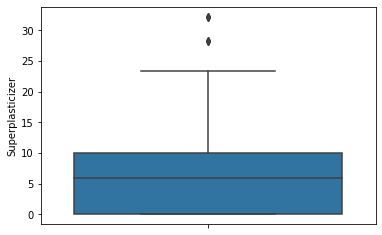

In [2508]:
sns.boxplot(y=df['Superplasticizer'])

In [2509]:
#replacing outliers in Superplasticizer with median
df['Superplasticizer']=np.where(df['Superplasticizer']>25,df['Superplasticizer'].median(),df['Superplasticizer'])

<AxesSubplot:ylabel='Superplasticizer'>

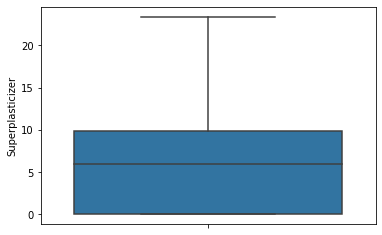

In [2510]:
sns.boxplot(y=df['Superplasticizer'])

<AxesSubplot:ylabel='CoarseAggregate'>

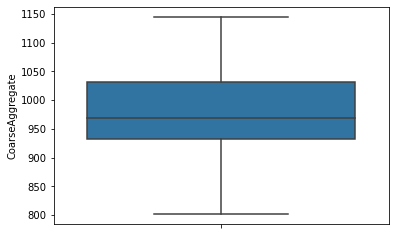

In [2511]:
sns.boxplot(y=df['CoarseAggregate'])

In [2512]:
sum(df['FineAggregate']>950)

5

In [2513]:
sum(df['FineAggregate']<650)

85

<AxesSubplot:ylabel='FineAggregate'>

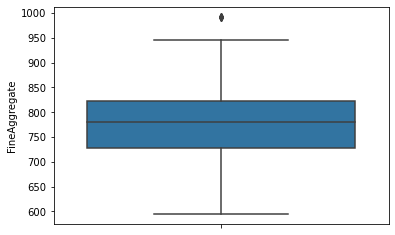

In [2514]:
sns.boxplot(y=df['FineAggregate'])

In [2515]:
#replacing outliers in FineAggregate with median
df['FineAggregate']=np.where(df['FineAggregate']>950,df['FineAggregate'].median(),df['FineAggregate'])
df['FineAggregate']=np.where(df['FineAggregate']<650,df['FineAggregate'].median(),df['FineAggregate'])

In [2516]:
sum(df['FineAggregate']>950)

0

In [2517]:
sum(df['FineAggregate']<650)

0

<AxesSubplot:ylabel='FineAggregate'>

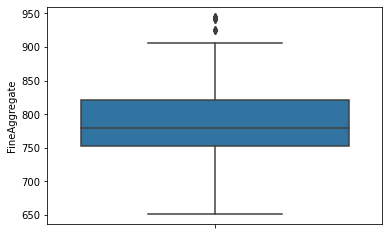

In [2518]:
sns.boxplot(y=df['FineAggregate'])

In [2519]:
sum(df['Age']>150)

59

<AxesSubplot:ylabel='Age'>

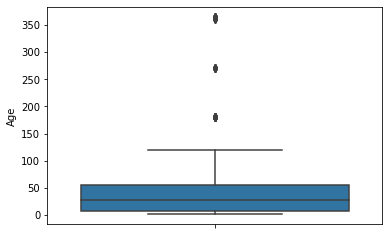

In [2520]:
sns.boxplot(y=df['Age'])

In [2521]:
#replacing outliers in Age with median
df['Age']=np.where(df['Age']>150,df['Age'].median(),df['Age'])

In [2522]:
sum(df['Age']>150)

0

<AxesSubplot:ylabel='Age'>

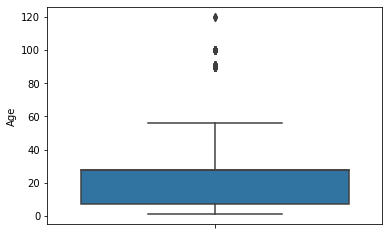

In [2523]:
sns.boxplot(y=df['Age'])

<AxesSubplot:ylabel='Ccstrength'>

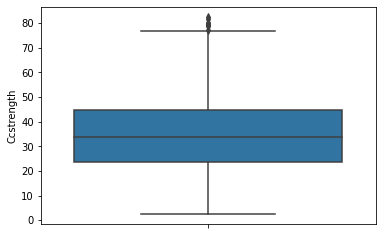

In [2524]:
sns.boxplot(y=df['Ccstrength'])

In [2525]:
#replacing outliers in Ccstrength with median
df['Ccstrength']=np.where(df['Ccstrength']>75,df['Ccstrength'].median(),df['Ccstrength'])

<AxesSubplot:ylabel='Ccstrength'>

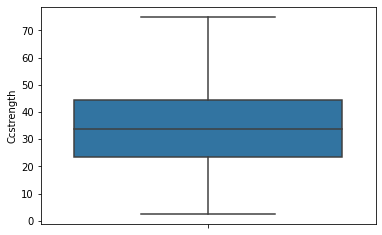

In [2526]:
 sns.boxplot(y=df['Ccstrength'])

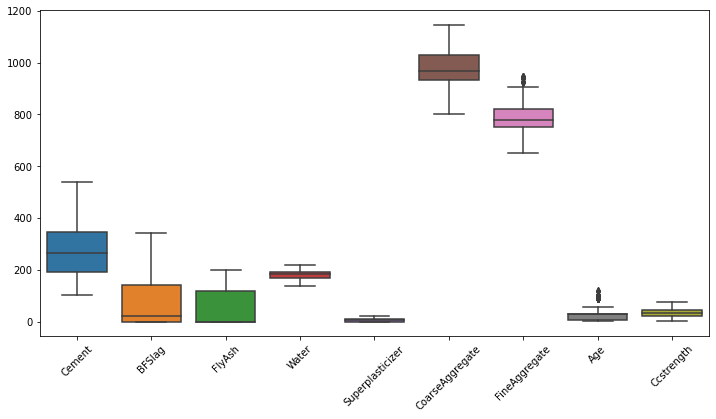

In [2527]:
plt.subplots(figsize=(12,6))
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [2528]:
#calculating correlation matrix
continuous_cols=['Cement','BFSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','Ccstrength']
#creating correlation matirx
correlation_data=df[continuous_cols].corr()
correlation_data

,Cement,BFSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Ccstrength
Cement,1.000000,-0.306612,-0.385535,-0.129087,-0.026451,-0.084684,-0.110829,-0.038911,0.479898
BFSlag,-0.306612,1.000000,-0.306263,0.119043,0.032964,-0.273699,-0.290318,-0.036144,0.074185
FlyAsh,-0.385535,-0.306263,1.000000,-0.258536,0.492545,-0.029935,0.009582,0.064498,-0.059383
Water,-0.129087,0.119043,-0.258536,1.000000,-0.597004,-0.164938,-0.240465,-0.067232,-0.368205
Superplasticizer,-0.026451,0.032964,0.492545,-0.597004,1.000000,-0.197405,0.037170,0.057564,0.297906
CoarseAggregate,-0.084684,-0.273699,-0.029935,-0.164938,-0.197405,1.000000,-0.084764,0.022777,-0.151569
FineAggregate,-0.110829,-0.290318,0.009582,-0.240465,0.037170,-0.084764,1.000000,0.063057,-0.147887
Age,-0.038911,-0.036144,0.064498,-0.067232,0.057564,0.022777,0.063057,1.000000,0.487166
Ccstrength,0.479898,0.074185,-0.059383,-0.368205,0.297906,-0.151569,-0.147887,0.487166,1.000000


In [2529]:
correlation_data['Ccstrength'][abs(correlation_data['Ccstrength'])>0.5]

Ccstrength    1.0
Name: Ccstrength, dtype: float64

In [2530]:
correlation_data['Ccstrength'][abs(correlation_data['Ccstrength'])<0.5]

Cement              0.479898
BFSlag              0.074185
FlyAsh             -0.059383
Water              -0.368205
Superplasticizer    0.297906
CoarseAggregate    -0.151569
FineAggregate      -0.147887
Age                 0.487166
Name: Ccstrength, dtype: float64

<AxesSubplot:xlabel='Ccstrength', ylabel='Density'>

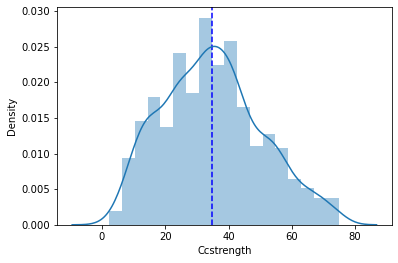

In [2531]:
#Finding the distributuion of target variable
plt.axvline(df.Ccstrength.mean(),linestyle="dashed",label="mean",color="blue")
sns.distplot(df.Ccstrength) 

Ccstrength is normally distributed

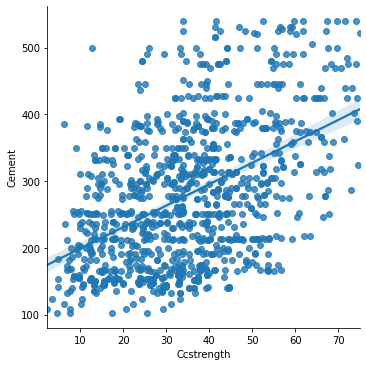

In [2532]:
# Creating linear model plot for each predictor vs the target variable
sns.lmplot(data=df,x='Ccstrength',y='Cement')

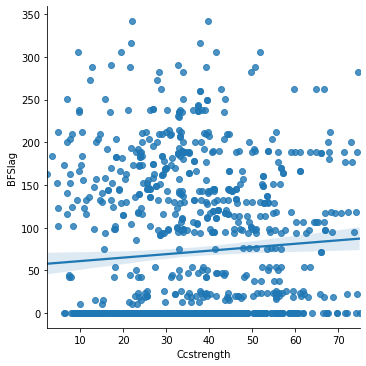

In [2533]:
 sns.lmplot(data=df,x='Ccstrength',y='BFSlag')

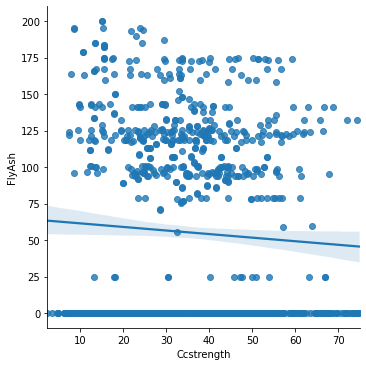

In [2534]:
 sns.lmplot(data=df,x='Ccstrength',y='FlyAsh')

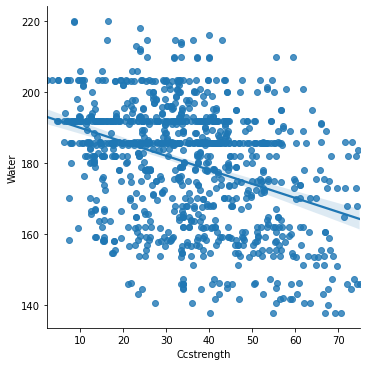

In [2535]:
 sns.lmplot(data=df,x='Ccstrength',y='Water')

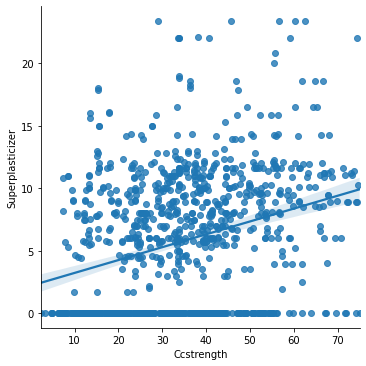

In [2536]:
 sns.lmplot(data=df,x='Ccstrength',y='Superplasticizer')

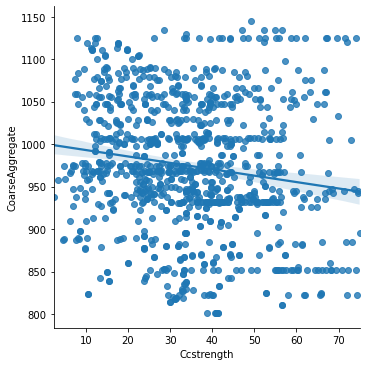

In [2537]:
 sns.lmplot(data=df,x='Ccstrength',y='CoarseAggregate')

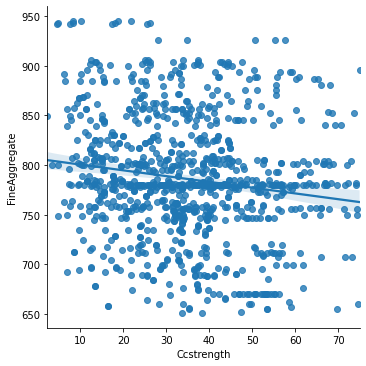

In [2538]:
 sns.lmplot(data=df,x='Ccstrength',y='FineAggregate')

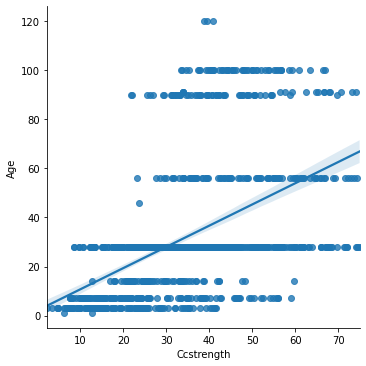

In [2539]:
 sns.lmplot(data=df,x='Ccstrength',y='Age')

Each variable has a relationship with Ccstrength.

In [2540]:
# Omitting missing values

df_omit = df.dropna(axis = 0)

### Linear Regression

  - Model - Ccstrength ~ Cement + Water + Age

In [2541]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.preprocessing import StandardScaler

In [2542]:
# Separating Target Variable and Predictor Variables
Y=df["Ccstrength"]
X=df[['Cement','Water','Age']]

In [2543]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 704
Testing Data Count: 302


In [2544]:
# Model building
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     299.2
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          6.01e-125
Time:                        23:08:49   Log-Likelihood:                -2632.3
No. Observations:                 704   AIC:                             5273.
Df Residuals:                     700   BIC:                             5291.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.0648      4.517     11.748      0.000      44.197      61.933
Cement         0.0686      0.004     18.092      0.000       0.061       0.076
Water         -0.2565      0.023    -10.998      0.000      -0.302      -0.211
Age            0.2769      0.014     20.150      0.000       0.250       0.304
==============================================================================
Omnibus:                       15.365   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.825
Skew:                           0.364   Prob(JB):                     0.000366
Kurtosis:                       3.099   Cond. No.                     4.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2545]:
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_preds))) 

Root Mean Squared Error (RMSE) : {'RMSE-test from model': 10.677034591033296, 'Base RMSE': 16.060443154597692}


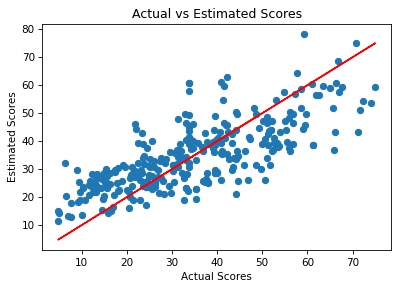

In [2546]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Actual vs Estimated Scores")
plt.show()

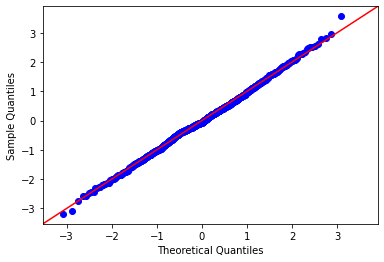

In [2547]:
# Random data points generated
data_points = np.random.normal(0, 1, 990)    
  
sm.qqplot(data_points, line ='45')
py.show()

Model_2 - Ccstrength ~ Cement + Water + Superplasticizer + CoarseAggregate + Age

In [2548]:
X2=df[['Cement','Water','Age','Superplasticizer','CoarseAggregate']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.3, random_state = 3)

print('Training Data Count:', X2_train.shape[0])
print('Testing Data Count::', X2_test.shape[0])

Training Data Count: 704
Testing Data Count:: 302


In [2549]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y2_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          5.06e-139
Time:                        23:08:50   Log-Likelihood:                -2593.8
No. Observations:                 704   AIC:                             5200.
Df Residuals:                     698   BIC:                             5227.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.9329      9.389      7.129      0.000      48.499      85.367
Cement               0.0689      0.004     18.668      0.000       0.062       0.076
Water               -0.1965      0.030     -6.579      0.000      -0.255      -0.138
Age                  0.2794      0.013     21.416      0.000       0.254       0.305
Superplasticizer     0.4179      0.096      4.345      0.000       0.229       0.607
CoarseAggregate     -0.0280      0.005     -5.345      0.000      -0.038      -0.018
==============================================================================
Omnibus:                       22.482   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.012
Skew:                           0.356   Prob(JB):                     1.36e-06
Kurtosis:                       3.644   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2550]:
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y2_test, y2_preds)))

Root Mean Squared Error (RMSE) : {'RMSE-test from model': 10.45486078960228, 'Base RMSE': 16.060443154597692}


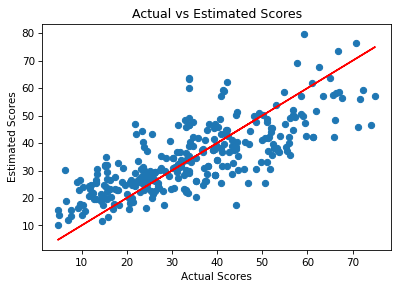

In [2551]:
X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Actual vs Estimated Scores")
plt.show()

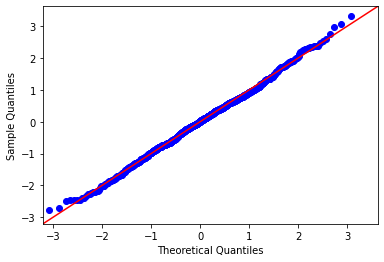

In [2552]:
# Random data points generated
data_points = np.random.normal(0, 1, 990)    
  
sm.qqplot(data_points, line ='45')
py.show()

Full Model - Ccstrength ~ Cement + BFSlag + FlyAsh + Water + Superplasticizer + CoarseAggregate + FineAggregate + Age

In [2553]:
X3=df[['Cement','BFSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age']]
Y = df['Ccstrength']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size = 0.3, random_state = 3)
print('Training Data Count:', X2_train.shape[0])
print('Testing Data Count::', X2_test.shape[0])

Training Data Count: 704
Testing Data Count:: 302


In [2554]:
X3_train = sm.add_constant(X3_train)

results3 = sm.OLS(y3_train, X3_train).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ccstrength   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          1.65e-173
Time:                        23:08:51   Log-Likelihood:                -2504.9
No. Observations:                 704   AIC:                             5028.
Df Residuals:                     695   BIC:                             5069.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.6782     15.162      4.398      0.000      36.910      96.446
Cement               0.0910      0.005     17.356      0.000       0.081       0.101
BFSlag               0.0597      0.007      9.142      0.000       0.047       0.073
FlyAsh               0.0391      0.009      4.292      0.000       0.021       0.057
Water               -0.2438      0.030     -8.151      0.000      -0.302      -0.185
Superplasticizer     0.1449      0.096      1.502      0.134      -0.045       0.334
CoarseAggregate     -0.0127      0.006     -2.268      0.024      -0.024      -0.002
FineAggregate       -0.0219      0.007     -2.942      0.003      -0.037      -0.007
Age                  0.2864      0.012     24.802      0.000       0.264       0.309
==============================================================================
Omnibus:                       24.958   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.031
Skew:                          -0.035   Prob(JB):                     3.39e-14
Kurtosis:                       4.452   Cond. No.                     6.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2555]:
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y3_test, y3_preds)))

Root Mean Squared Error (RMSE) : {'RMSE-test from model': 9.618149416453397, 'Base RMSE': 16.060443154597692}


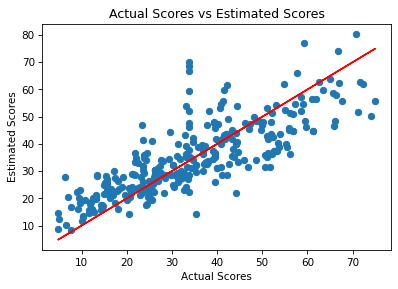

In [2556]:
X3_test = sm.add_constant(X3_test)
y3_preds = results3.predict(X3_test)

plt.figure(dpi = 75) 
plt.scatter(y3_test, y3_preds)
plt.plot(y3_test, y3_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Actual Scores vs Estimated Scores")
plt.show()

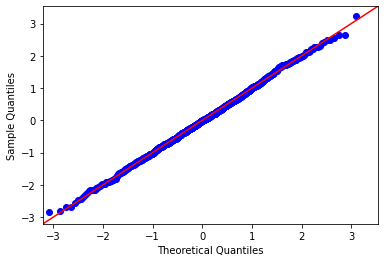

In [2571]:
# Random data points generated
data_points = np.random.normal(0, 1, 990)  
  
sm.qqplot(data_points, line ='45')
py.show()